### The aim of this notebook is to demonstrate the shortcomings of AUC as a metric, and how we can find our way around these shortcomings

In [1]:
import numpy as np
import pandas as pd

In [69]:
### Lets make some data

threshold = 0.6
Y_Actual = ((np.arange(0,10)>np.random.randint(0,6))).astype(np.int8)
Y_Pred = np.random.randint(0,10,10)/np.random.randint(10,20)
Pred_Class = (Y_Pred>threshold).astype(np.int8)
Pred_Class

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int8)

In [79]:
### Lets calculate AUC of this very cooked up data
from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(Y_Actual, Y_Pred))

AUC: 0.875


#### Another perspective: Ranking 

In [78]:
### Lets rank the probabilies by using rank avg in scipy

import scipy
RankProbs = scipy.stats.rankdata(Y_Pred)
print("RankAverages:",RankProbs)
print("AUC:",roc_auc_score(Y_Actual, RankProbs))

RankAverages: [ 2.   3.   6.   9.   7.5  1.   7.5  4.5 10.   4.5]
AUC: 0.875


Text(0.5, 0, 'Probability value')

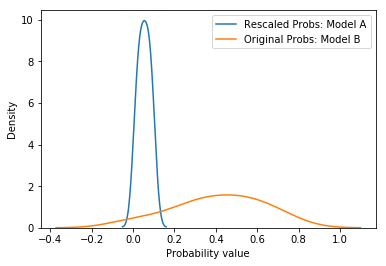

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(RankProbs/100,label="Rescaled Probs: Model A");
sns.kdeplot(Y_Pred.clip(0,1.1),label="Original Probs: Model B");
plt.ylabel("Density")
plt.xlabel("Probability value")

In [108]:
print("AUC:",roc_auc_score(Y_Actual, RankProbs/100))

AUC: 0.875


#### More analysis to follow in next post